# Deep Neural Network (DNN)
- Fashion MNIST Database

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## Set the hyperparameters

In [2]:
batch_size = 128
max_epochs = 10
learning_rate = 0.001
num_classes = 10

## 데이터 불러오기 Import the Fashion MNIST dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 전처리 Preprocess the data

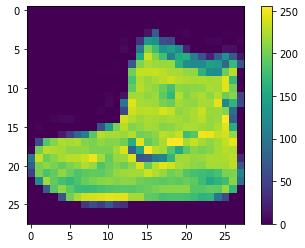

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
'Normalization'
train_images = train_images / 255.0
test_images = test_images / 255.0

'수치 데이터의 자료형 지정. 필수는 아닌 듯'
train_images = train_images.astype(np.float32)
train_labels = train_labels.astype(np.int32)
test_images = test_images.astype(np.float32)
test_labels = test_labels.astype(np.int32)

# '[N, 28, 28, 1] -> [N, 784]'
# train_images = train_images.reshape([-1, 28 * 28])
# test_images = test_images.reshape([-1, 28 * 28])

In [7]:
# for training
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=100000)
train_dataset = train_dataset.prefetch(buffer_size=batch_size)
train_dataset = train_dataset.batch(batch_size, drop_remainder=True)
train_dataset = train_dataset.repeat()

# for test
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = test_dataset.prefetch(buffer_size=batch_size)
test_dataset = test_dataset.batch(batch_size, drop_remainder=True)
test_dataset = test_dataset.repeat()

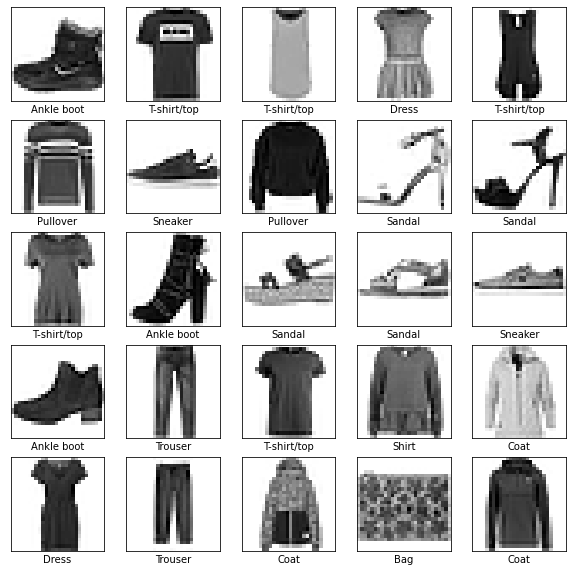

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구축 Build the model
- model1: tf.Dataset으로 학습
- model2: np.array로 학습

#### 층 설정 Set up the layers

In [9]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),    # [N, 28, 28, 1] -> [N, 784]
    tf.keras.layers.Dense(128, activation='relu'),    # 1st dense layer: 128 nodes
    tf.keras.layers.Dense(10)    # 2nd dense layer: returns a logits array with length of 10
])


model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),    # [N, 28, 28, 1] -> [N, 784]
    tf.keras.layers.Dense(128, activation='relu'),    # 1st dense layer: 128 nodes
    tf.keras.layers.Dense(10)    # 2nd dense layer: returns a logits array with length of 10
])

#### 모델 컴파일 Compile the model

In [10]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 모델 학습 Train the model
#### 학습용 데이터 투입 Feed the model

In [11]:
model1.fit(train_dataset,
    epochs = max_epochs,
    steps_per_epoch = len(train_images) // batch_size
         )

Epoch 1/10
468/468 [==============================] - 1s 2ms/step - loss: 0.5595 - accuracy: 0.8091
Epoch 2/10
468/468 [==============================] - 1s 2ms/step - loss: 0.4081 - accuracy: 0.8584
Epoch 3/10
468/468 [==============================] - 1s 2ms/step - loss: 0.3631 - accuracy: 0.8720
Epoch 4/10
468/468 [==============================] - 1s 2ms/step - loss: 0.3419 - accuracy: 0.8781
Epoch 5/10
468/468 [==============================] - 1s 2ms/step - loss: 0.3233 - accuracy: 0.8836
Epoch 6/10
468/468 [==============================] - 1s 2ms/step - loss: 0.3057 - accuracy: 0.8901
Epoch 7/10
468/468 [==============================] - 1s 2ms/step - loss: 0.2944 - accuracy: 0.8932
Epoch 8/10
468/468 [==============================] - 1s 2ms/step - loss: 0.2847 - accuracy: 0.8962
Epoch 9/10
468/468 [==============================] - 1s 2ms/step - loss: 0.2732 - accuracy: 0.9002
Epoch 10/10
468/468 [==============================] - 1s 2ms/step - loss: 0.2636 - accuracy: 0.9034

In [12]:
model2.fit(train_images, train_labels,
    epochs = max_epochs
         )

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4982 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3764 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3395 - accuracy: 0.8757
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3149 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2974 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2818 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2691 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2587 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2482 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.240

#### 정확도 평가 Evaluate accuracy

In [13]:
test_loss1, test_acc1 = model1.evaluate(test_dataset, steps = len(test_images)//batch_size, verbose=2)
print('Test accuracy:', test_acc1)
print('\n')
test_loss2, test_acc2 = model2.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:', test_acc2)

78/78 - 0s - loss: 0.3346 - accuracy: 0.8801
Test accuracy: 0.8801081776618958


313/313 - 0s - loss: 0.3488 - accuracy: 0.8737
Test accuracy: 0.8737000226974487


#### 예측하기 Make predictions

In [14]:
probability_model1 = tf.keras.Sequential([model1, tf.keras.layers.Softmax()])
predictions1 = probability_model1.predict(test_images)


probability_model2 = tf.keras.Sequential([model2, tf.keras.layers.Softmax()])
predictions2 = probability_model2.predict(test_images)

In [15]:
print(np.argmax(predictions1[0]))
print(np.argmax(predictions2[0]))

9
9


In [16]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

#### 예측 검증 Verify predictions

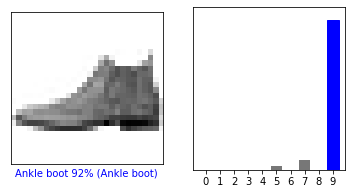

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions1[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions1[i],  test_labels)
plt.show()

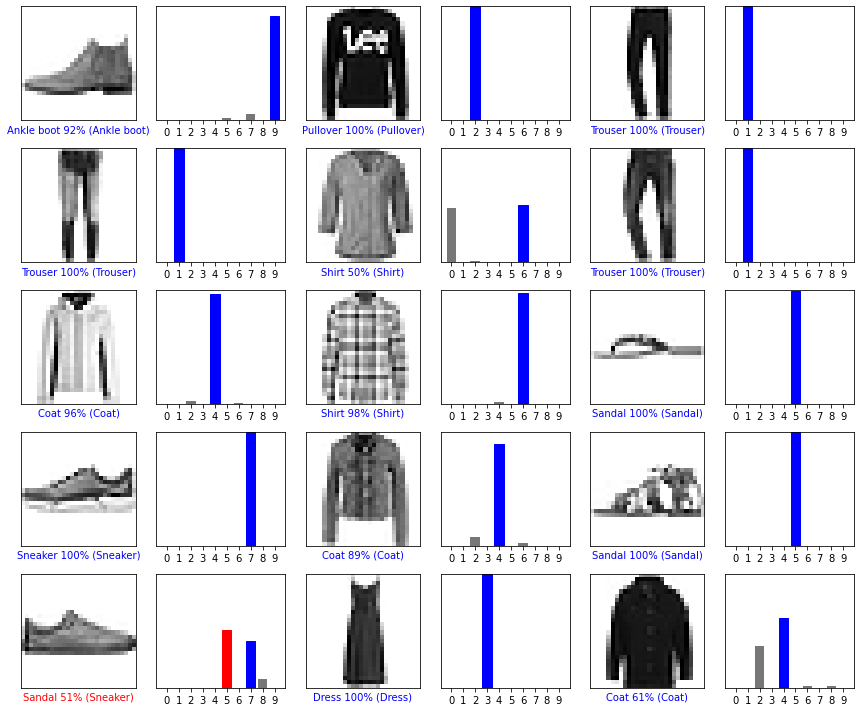

In [18]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions1 in blue and incorrect predictions1 in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions1[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions1[i], test_labels)
plt.tight_layout()
plt.show()

## 모델 사용 Use the trained model

In [19]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [20]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [21]:
predictions_single1 = probability_model1.predict(img)

print(predictions_single1)

[[1.4504559e-05 6.3276433e-09 9.9925059e-01 4.0981001e-09 4.2509456e-04
  1.1806051e-11 3.0973129e-04 9.3307900e-16 4.8603437e-09 1.4412542e-13]]


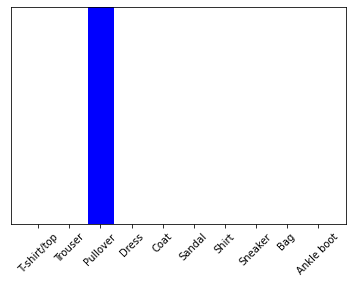

In [22]:
plot_value_array(1, predictions_single1[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [23]:
np.argmax(predictions_single1[0])

2

## Discussion
- input pipeline을 어떻게 구축할 것인가?

tf.Dataset으로 만들면 x_train과 y_train을 합쳐야 함. 대신에 shuffle, batch 등 설정 가능.

np.array 타입의 x_train과 y_train을 바로 fit시킬 수도 있다.

- x_train의 차원 변경 [N, 28, 28, 1] -> [N, 784]

전처리에서 reshape([-1, 28 * 28])을 사용할 것인가, 모델에서 tf.keras.layers.Flatten(input_shape=(28, 28))을 사용할 것인가?